In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.ndimage import median_filter
import nibabel
import MedianFilter
from linetimer import CodeTimer
from skimage.metrics import mean_squared_error


In [2]:
GPUBackend='CUDA'
if GPUBackend=='OpenCL':
    MedianFilter.InitOpenCL('RTX 3060')
elif GPUBackend=='CUDA':
    MedianFilter.InitCUDA('RTX 3060')
else:
    MedianFilter.InitMetal('RTX 3060')

Number of CUDA devices found: 1


In [3]:
CT_nib=nibabel.load('C:/Users/alanc/Documents/NeuroFUS/BabelBrain_Test_Data/SDR_0p55/CT.nii.gz')
data=CT_nib.get_fdata().astype(np.uint8)
data=np.ascontiguousarray(data)

In [4]:
with CodeTimer("GPU Median Filter", unit="s"):
    data_filter=MedianFilter.MedianFilter(data,7,GPUBackend=GPUBackend)
with CodeTimer("CPU Median Filter", unit="s"):
    data_filter_truth=median_filter(data,7)

if data_filter.size != data_filter_truth.size:
    print(f"Array sizes don't match: {data_filter.size} vs {data_filter_truth.size}")
if data_filter.size == 0:
    print("Arrays are empty")
print(f"Data matches? {np.all(data_filter_truth==data_filter)}")

matches = abs(data_filter - data_filter_truth) < 1e-6
matches_count = len(matches[matches==True])

dice_coeff = 2 * matches_count / (data_filter_truth.size + data_filter.size)

print(f"Dice Coefficient: {dice_coeff}")

mse = mean_squared_error(data_filter_truth,data_filter)
print(f"Mean square error: {mse}")

Code block 'GPU Median Filter' took: 4.44836 s
Code block 'CPU Median Filter' took: 122.07532 s
Data matches? True
Dice Coefficient: 1.0
Mean square error: 0.0


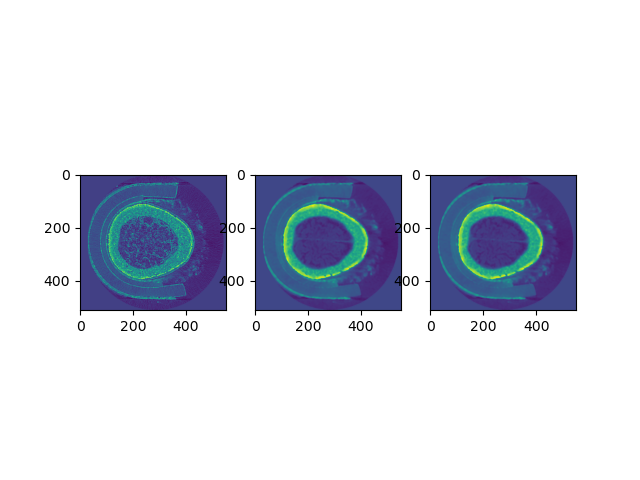

In [5]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(data[:,:,200])
plt.subplot(1,3,2)
plt.imshow(data_filter_truth[:,:,200])
plt.subplot(1,3,3)
plt.imshow(data_filter[:,:,200])